In [1]:
import naverAPI as napi
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
food = df_category[df_category['p_id'] == 50000006] # 음식 카테고리
b = food[['id','name']].to_dict('tight')
to_be_found = np.array(b['data'])
test_category_list = napi.listToCategoryDict(to_be_found)
print(test_category_list)
res = napi.createTrendData(client_id, client_secret, test_category_list, "2025-10-02", "2025-10-09")


[{'name': np.str_('축산물'), 'param': ['50000145']}, {'name': np.str_('수산물'), 'param': ['50000159']}, {'name': np.str_('농산물'), 'param': ['50000160']}, {'name': np.str_('반찬'), 'param': ['50000146']}, {'name': np.str_('김치'), 'param': ['50000147']}, {'name': np.str_('음료'), 'param': ['50000148']}, {'name': np.str_('과자/베이커리'), 'param': ['50000149']}, {'name': np.str_('유가공품'), 'param': ['50000150']}, {'name': np.str_('냉동/간편조리식품'), 'param': ['50000026']}, {'name': np.str_('건강식품'), 'param': ['50000023']}, {'name': np.str_('다이어트식품'), 'param': ['50000024']}, {'name': np.str_('통조림/캔'), 'param': ['50011940']}, {'name': np.str_('제과/제빵재료'), 'param': ['50012460']}, {'name': np.str_('조미료'), 'param': ['50012520']}, {'name': np.str_('식용유/오일'), 'param': ['50012620']}, {'name': np.str_('소스/드레싱'), 'param': ['50012782']}, {'name': np.str_('가루/분말류'), 'param': ['50013360']}, {'name': np.str_('잼/시럽'), 'param': ['50013520']}, {'name': np.str_('라면/면류'), 'param': ['50013960']}, {'name': np.str_('장류'), 'param': ['500

In [3]:
with open('output/res_temp.json', 'w', encoding='utf-8') as f:
            json.dump(res, f, ensure_ascii=False, indent=4)
    

In [4]:
with open('output/res_temp.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
datalist=data['datalist']
data

{'startdate': '2025-10-02',
 'enddate': '2025-10-09',
 'datalist': [{'title': '축산물',
   'category': ['50000145'],
   'data': [{'period': '2025-10-02', 'ratio': 34.36252990068879},
    {'period': '2025-10-03', 'ratio': 28.092679805876664},
    {'period': '2025-10-04', 'ratio': 23.503983589730456},
    {'period': '2025-10-05', 'ratio': 20.808697971536578},
    {'period': '2025-10-06', 'ratio': 19.03942170044545},
    {'period': '2025-10-07', 'ratio': 20.56579423825982},
    {'period': '2025-10-08', 'ratio': 21.452729206857327},
    {'period': '2025-10-09', 'ratio': 25.05870818959138}]},
  {'title': '수산물',
   'category': ['50000159'],
   'data': [{'period': '2025-10-02', 'ratio': 37.622163012942},
    {'period': '2025-10-03', 'ratio': 32.48138412787868},
    {'period': '2025-10-04', 'ratio': 29.151254606571815},
    {'period': '2025-10-05', 'ratio': 27.158235569826417},
    {'period': '2025-10-06', 'ratio': 27.560901818337634},
    {'period': '2025-10-07', 'ratio': 29.958882055538034},
  

In [5]:
data_period = []
data_ratio = []
data_title = []
for dd in datalist:
    data_title.append(dd['title'])
    temp = []
    temp1 = []
    for ddd in dd['data']:
        temp.append(ddd['ratio'])
        temp1.append(ddd['period'])
    data_ratio.append(temp)
    data_period.append(temp1)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

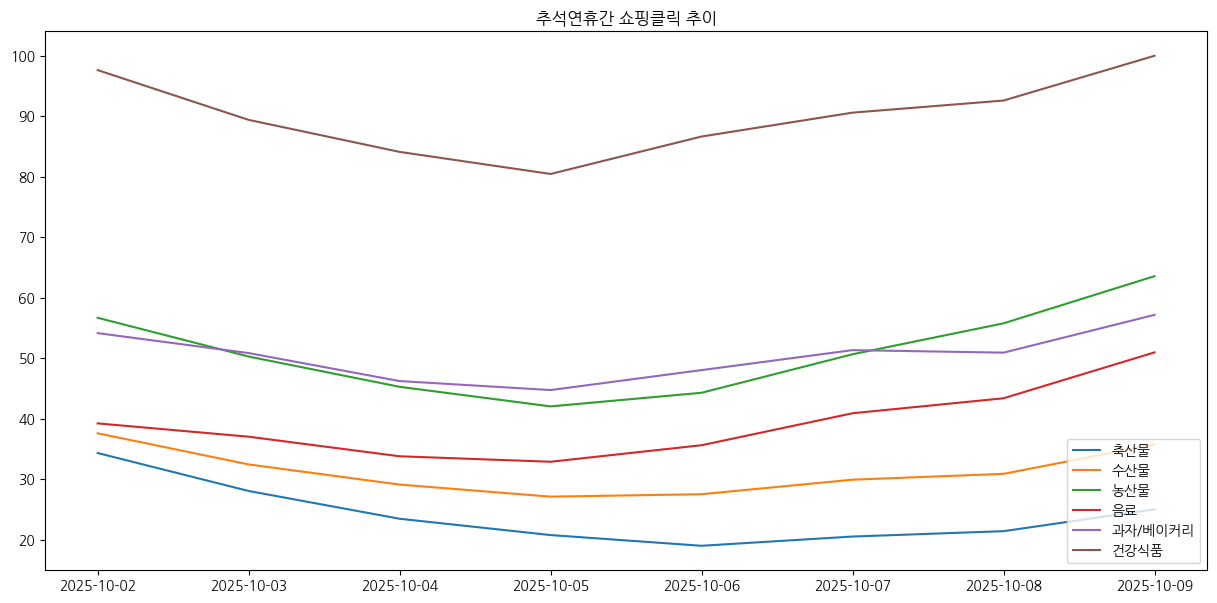

In [10]:

plt.figure(figsize=(15,7))
for i, title in enumerate(data_title):
    if max(data_ratio[i]) > 30:
        plt.plot(data_period[i], data_ratio[i], label=title)
plt.legend(loc='lower right')
plt.title('추석연휴간 쇼핑클릭 추이')
plt.show()

# 시간대별 쇼핑 클릭 추이수

In [9]:
import naverAPI as napi
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [10]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
df_category[df_category['level']==1]


,id,p_id,name,level
0,50000000,0,패션의류,1
78,50000001,0,패션잡화,1
413,50000002,0,화장품/미용,1
595,50000003,0,디지털/가전,1
1421,50000004,0,가구/인테리어,1
1833,50000005,0,출산/육아,1
2359,50000006,0,식품,1
3046,50000007,0,스포츠/레저,1
3618,50000008,0,생활/건강,1
5054,50000009,0,여가/생활편의,1


In [27]:


def draw_shopping_plot(search_cat, startdate, enddate, threshold=30, gender:str=None, ages:list=None):
 # 음식 카테고리
    b = search_cat[['id','name']].to_dict('tight')
    to_be_found = np.array(b['data'])
    test_category_list = napi.listToCategoryDict(to_be_found)
    print(len(test_category_list))
    res = napi.createTrendData(client_id, client_secret, test_category_list, startdate, enddate, gender=gender, ages=ages)

    with open('output/res_temp.json', 'w', encoding='utf-8') as f:
                json.dump(res, f, ensure_ascii=False, indent=4)

    results = res['datalist']
    all_data = []
    DEFAULT_GROUP = "전체" 

    # 중첩된 구조를 순회하며 'title'과 'group' 정보를 연결
    for item in results:
        current_title = item['title']
        item_data = item['data']
        
        # ------------------------------------------------------------------
        # 🚨 핵심 변경 로직: Title 블록의 첫 번째 항목을 확인하여 일괄 처리
        # ------------------------------------------------------------------
        
        # data 리스트가 비어있지 않은지 확인
        if item_data:
            # 첫 번째 데이터 항목에 'group' 키가 있는지 확인
            is_group_present = 'group' in item_data[0]
        else:
            # data 리스트가 비어있으면 건너뜀
            continue 
        
        for sub_item in item_data:
            
            # 'group' 키가 존재하는 경우: 실제 값을 사용
            if is_group_present:
                current_group = sub_item['group']
            # 'group' 키가 존재하지 않는 경우: 일괄적으로 기본값 사용
            else:
                current_group = DEFAULT_GROUP

            row = {
                'title': current_title,
                'group': current_group, 
                'period': sub_item['period'],
                'ratio': sub_item['ratio']
            }
            all_data.append(row)

    # DataFrame 생성 및 period를 datetime으로 변환
    df = pd.DataFrame(all_data)
    df['period'] = pd.to_datetime(df['period'])

    print("--- 준비된 DataFrame (Title 블록별 Group 처리) ---")
    print(df)
    print("\n--- 'group' 컬럼의 고유 값 ---")
    print(df['group'].unique())

    plt.figure(figsize=(12, 7))

    # 2. 'title'과 'group' 컬럼을 조합하여 고유한 그룹핑 기준 생성
    unique_combinations = df.groupby(['title', 'group']).groups.keys()
    # print(f"\n--- 발견된 고유 조합: {list(unique_combinations)} ---")

    # 3. 각 조합별로 반복하며 선 그래프 그리기
    for title_name, group_name in unique_combinations:
        # 현재 조합에 해당하는 데이터만 필터링
        df_combo = df[(df['title'] == title_name) & (df['group'] == group_name)]
        
        # 범례에 표시할 라벨 생성 (예: '패션의류 - 20대', '화장품/미용 - 전체')
        label_name = f"{title_name} - {group_name}"
        
        # plot 함수 실행
        if max(df_combo['ratio'])>threshold:
            plt.plot(
                df_combo['period'], 
                df_combo['ratio'], 
                marker='o',         
                linestyle='-',      
                label=label_name    # 조합별 라벨
        )

    # 4. 그래프 꾸미기
    plt.title('Ratio Trend by Category and Age Group (Title Block Check)')
    plt.xlabel('Period')
    plt.ylabel('Ratio Value')
    plt.legend(title='Combination', bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.grid(True, linestyle='--')
    plt.xticks(rotation=45) 
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

    # data_period = []
    # data_ratio = []
    # data_title = []
    # data_group = []
    # for dd in datalist:
    #     data_title.append(dd['title'])

    #     temp = []
    #     temp1 = []
    #     for ddd in dd['data']:
    #         temp.append(ddd['ratio'])
    #         temp1.append(ddd['period'])
    #         if 'group' in ddd:
    #             data_group.append(ddd['group'])
    #     data_ratio.append(temp)
    #     data_period.append(temp1)


    # plt.figure(figsize=(15,7))
    # for i, title in enumerate(data_title):
    #     #print(title)
    #     #print(data_ratio[i])
    #     if len(data_group) != 0:   
    #         if max(data_ratio[i])>threshold:
    #             plt.plot(data_period[i], data_ratio[i], label=title+data_group[i])
    #     else:
    #          if max(data_ratio[i])>threshold:
    #             plt.plot(data_period[i], data_ratio[i], label=title)
    # plt.legend()
    # plt.xticks(rotation = 45, ha ='right')
    # ax = plt.gca()

    # # 모든 x축 레이블 객체를 리스트로 가져옵니다.
    # xticklabels = ax.get_xticklabels()

    # # 강조하고 싶은 문자열을 정의합니다.
    # highlight_name = ["2025-10-03", "2025-10-04","2025-10-05","2025-10-06","2025-10-07","2025-10-08","2025-10-09"]
    # highlight_color = 'red'

    # # 레이블 객체를 순회하며 조건 확인
    # for label in xticklabels:
    #     # label.get_text()로 레이블의 문자열 내용을 가져옵니다.
    #     if label.get_text() in highlight_name:
    #         # 조건이 일치하면 색상(color)과 글꼴 굵기(fontweight)를 변경합니다.
    #         label.set_color(highlight_color)
    #         label.set_fontweight('bold')
    #         label.set_fontsize(12) # 크기도 변경 가능
    # plt.show()


## 사람들이 가장 많이 누른 품목은?
- 추석 전후로 음식이 많을거 같음 $\Rightarrow$ 생활/건강이 많았다
- 의류와 식품이 10/3일에 교차됨
- 전체 클릭수는 추석 연휴보다 전후로 많았다
- 의류 18일 - 19일에 클릭수 급격 증가 $\Rightarrow$ 날씨영향(갑자기 추워질때) -> 아마 겨울의류를 많이 보지 않았을가

            id  p_id     name  level
0     50000000     0     패션의류      1
78    50000001     0     패션잡화      1
413   50000002     0   화장품/미용      1
595   50000003     0   디지털/가전      1
1421  50000004     0  가구/인테리어      1
1833  50000005     0    출산/육아      1
2359  50000006     0       식품      1
3046  50000007     0   스포츠/레저      1
3618  50000008     0    생활/건강      1
5054  50000009     0  여가/생활편의      1
5275  50005542     0       도서      1
11
--- 준비된 DataFrame (Title 블록별 Group 처리) ---
    title group     period      ratio
0    패션의류    전체 2025-09-26  42.138105
1    패션의류    전체 2025-09-27  45.969084
2    패션의류    전체 2025-09-28  56.465664
3    패션의류    전체 2025-09-29  46.831480
4    패션의류    전체 2025-09-30  45.073904
..    ...   ...        ...        ...
259    도서    전체 2025-10-15  11.276200
260    도서    전체 2025-10-16  10.550310
261    도서    전체 2025-10-17  10.034630
262    도서    전체 2025-10-18   8.738150
263    도서    전체 2025-10-19   9.374190

[264 rows x 4 columns]

--- 'group' 컬럼의 고유 값 ---
['전체

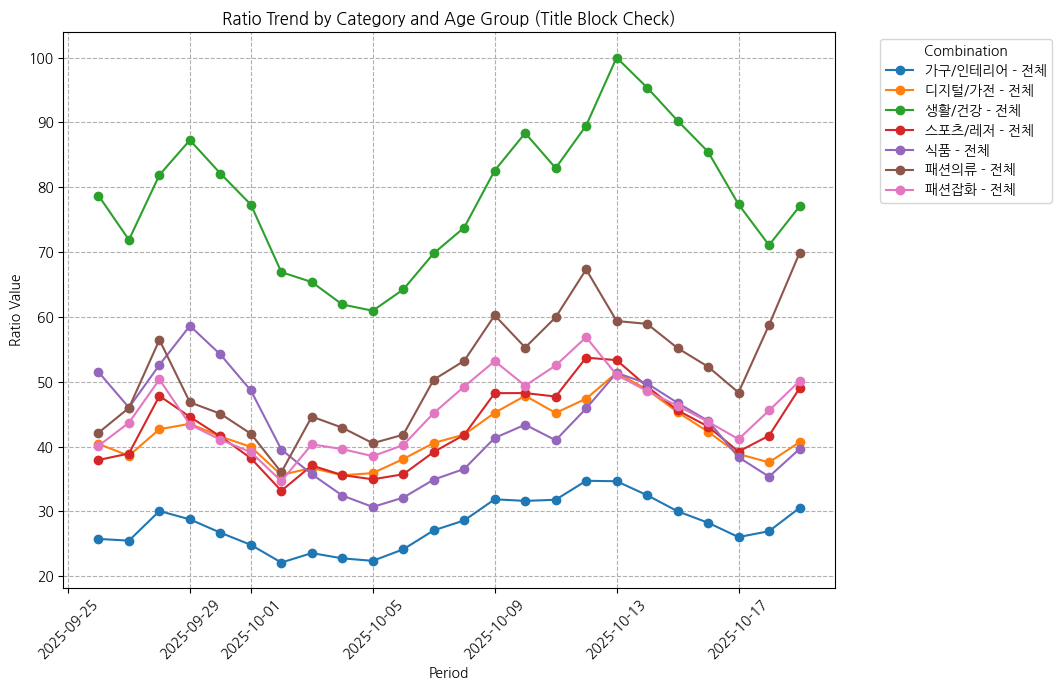

In [28]:

search_cat = df_category[(df_category['level'] == 1) & (df_category['name'] != '면세점')]
print(search_cat)
draw_shopping_plot(search_cat, "2025-09-26", "2025-10-19")

## 생활/건강이 뭐가 높은거지?
- 추석때 선물로 욕실세트나 아니면 휴지같은것들?, 그러기에는 추석 이후로 더 올라갔는데

**결과**
- 공구가 높다. 이해가 되지 않음 $\Rightarrow$ 공구분류에 많은 카테고리가 있을거 같다. $\Rightarrow$ 생활/건강의 품목이 많아서 그런듯 

In [30]:
search_cat = df_category[df_category['p_id'] == 50000008]
print(len(search_cat))
draw_shopping_plot(search_cat, "2025-09-26", "2025-10-19")

34
34


HTTPError: HTTP Error 429: Too Many Requests

In [31]:

print(df_category[df_category['name']=='주방용품'] )
search_cat = df_category[(df_category['p_id'] == 50000061) | (df_category['p_id'] == 50000165)]
print(len(search_cat))
draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", 50)

            id      p_id  name  level
4503  50000061  50000008  주방용품      2
35
35


HTTPError: HTTP Error 429: Too Many Requests

## 다음은 의류에 대해서 보자
**결과**
- 아까 봤듯이 날씨 때문에 10/18, 10/19에 클릭수 급증
- 남성의류와 여성의류 검색 추이 비슷
    - 궁금한점 : 남자, 여자는 무슨 의류를 더많이 검색했을까



In [32]:

print(df_category[df_category['name']=='패션의류'] )
search_cat = df_category[(df_category['p_id'] == 50000000)]
print(len(search_cat))
print(search_cat['name'])
draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", threshold=0, gender="f")

         id  p_id  name  level
0  50000000     0  패션의류      1
4
1          여성의류
23    여성언더웨어/잠옷
48         남성의류
66    남성언더웨어/잠옷
Name: name, dtype: object
4


HTTPError: HTTP Error 429: Too Many Requests

         id  p_id  name  level
0  50000000     0  패션의류      1
4
1          여성의류
23    여성언더웨어/잠옷
48         남성의류
66    남성언더웨어/잠옷
Name: name, dtype: object
4


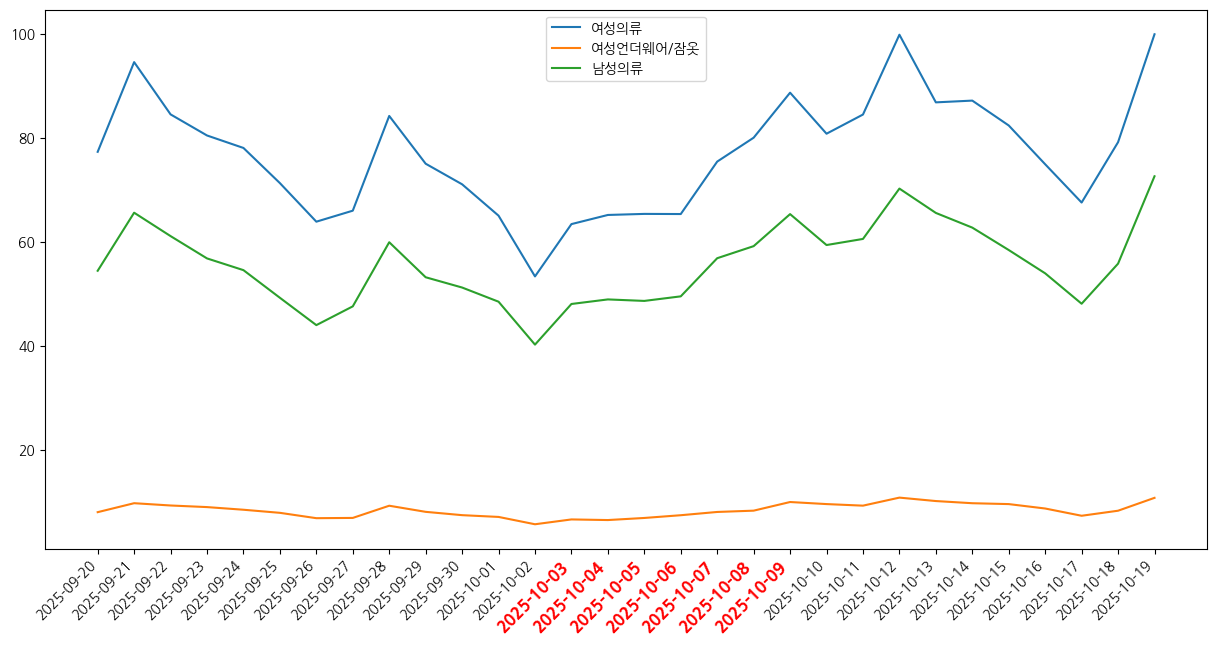

In [16]:

print(df_category[df_category['name']=='패션의류'] )
search_cat = df_category[(df_category['p_id'] == 50000000)]
print(len(search_cat))
print(search_cat['name'])

draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", threshold=10, ages=['10', '20', '30'])